In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import env
import pandas as pd

np.random.seed(123)

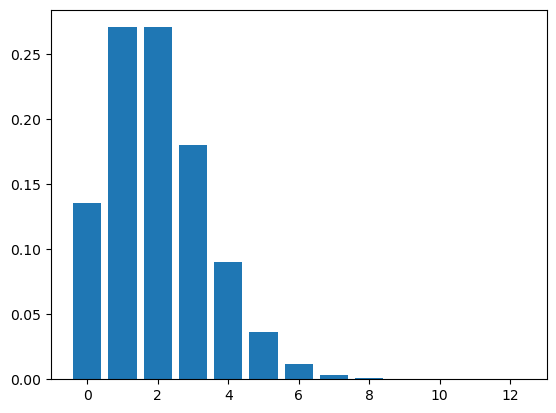

In [38]:
#1 
dist_mean = 2

prob_1 = stats.poisson(dist_mean)
domain = [n for n in range(13)]
prob = [prob_1.pmf(n) for n in domain]

plt.bar(domain, prob)
plt.show()

In [4]:
# What is the probability that no cars drive up in the noon hour?
prob_1.pmf(0)

0.1353352832366127

In [5]:
# What is the probability that 3 or more cars come through the drive through?
prob_1.sf(2)

0.32332358381693654

In [6]:
# How likely is it that the drive through gets at least 1 car?
prob_1.sf(0)

0.8646647167633873

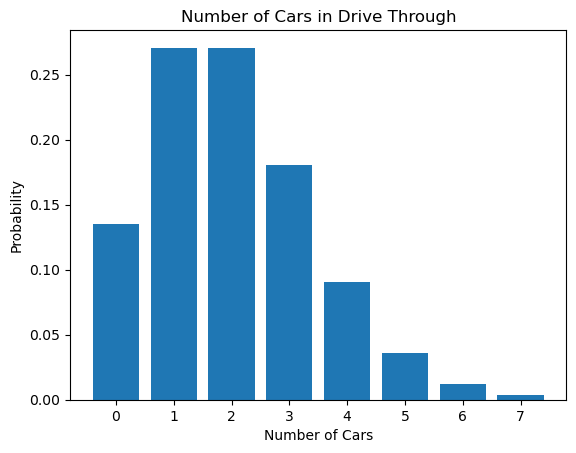

In [12]:
num_cars = range(0, 8)
prob_one_g = [prob_1.pmf(n) for n in num_cars]
plt.bar( num_cars, prob_one_g)
plt.title('Number of Cars in Drive Through')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.show()

2.) Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:


In [13]:
grad_mean = 3.0
grad_sd = .3
grad_norm = stats.norm(grad_mean,grad_sd)

In [14]:
# What grade point average is required to be in the top 5% of the graduating class?
grad_norm.isf(.05)

3.4934560880854417

In [17]:
# What GPA constitutes the bottom 15% of the class?
grad_norm.ppf(.15)

2.689069983151863

In [15]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
#Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
gpa_higher = grad_norm.ppf((.3)) 
gpa_lower = grad_norm.ppf(.2)
(gpa_lower,gpa_higher)



# Yes because they are barely within the 30% cutoff

(2.7475136299281258, 2.842679846187588)

In [18]:
# If I have a GPA of 3.5, what percentile am I in?
grad_norm.cdf(3.5)


# top 5

0.9522096477271853

3.) A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 
 How likely is it that this many people or more click through?

In [19]:
click_thr = 4326
click_prob = .02


In [20]:
stats.binom(click_thr, click_prob).sf(96)

# 11%

0.13975823631416448

In [21]:
stats.binom(click_thr, click_prob).pmf(97)

0.021942930454375544

4.) You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [22]:
hw_trial = 60
hw_prob = .01

stats.binom(hw_trial, hw_prob).sf(0)

0.45284335760923855

5.) The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [25]:
# .9 visit the area of 66 students

stud_in_co = 22
num_co = 3
prop_stud = .9
num_try = stud_in_co * num_co * prop_stud
num_try = round(num_try)

In [26]:
prob_clean = .03
clean_dist = stats.binom(num_try, prob_clean)

In [27]:
clean_dist.sf(0)

0.8342199288437352

In [28]:
clean_dist = stats.binom(num_try * 2, prob_clean)
clean_dist.pmf(0)

0.027483031992576134

In [29]:
clean_dist = stats.binom(num_try * 5, prob_clean)
clean_dist.pmf(0)

0.00012521651388091245

6.) You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [30]:
μ = 15 * 2 
σ = 3 * 2

total_lunch_time = 60 #mins
eat_time = 15 #mins
order_time = 2 #mins
cook_time = 10 #mins

max_wait = (total_lunch_time - eat_time) - order_time  - cook_time
max_wait

33

In [31]:
stats.norm(μ, σ).cdf(max_wait)



0.6914624612740131

In [34]:
print(f"There is a {round(stats.norm(μ, σ).cdf(max_wait), 3)*100}% chance you would have at least 15 minutes remaining to eat.")

There is a 69.1% chance you would have at least 15 minutes remaining to eat.


Text(0.5, 0, 'Wait time')

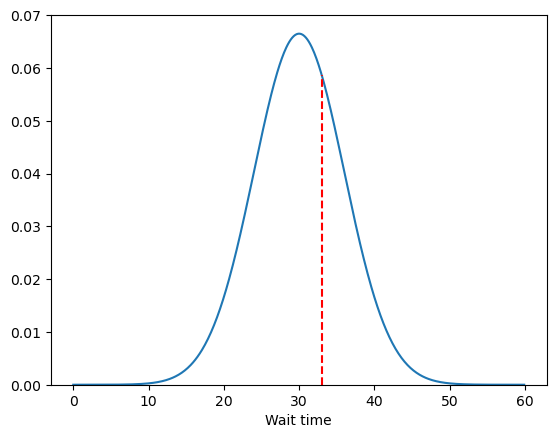

In [35]:
# plot the distibution
x = np.arange(0, 60 , 0.1)
y = stats.norm(μ, σ).pdf(x)

plt.plot(x,y)
plt.vlines(33, 0 ,stats.norm(μ, σ).pdf(33),  ls = '--', color = 'r')
plt.ylim(0,0.07)
plt.xlabel('Wait time')

7.)Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [40]:
from pydataset import data
import env

In [42]:
url = env.get_db_url('employees')
salaries = pd.read_sql('SELECT * FROM salaries where to_date >now()', url)

In [43]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [44]:
μ = salaries.salary.mean()
μ

72012.23585730705

In [45]:
σ = salaries.salary.std()
σ

17309.995380251985

In [46]:
#7.a
stats.norm(μ, σ).cdf(60000)

0.24385742480214434

In [47]:
#7.b
stats.norm(μ, σ).sf(95000)

0.09208819199804058

In [48]:
#7.c
# This mean I want:
# More than 65k
# Less than 80k

(stats.norm(μ, σ).cdf(80000)) - (stats.norm(μ, σ).cdf(65000))

0.33506056854466654

In [49]:
#another way to complete same problem
np.diff(stats.norm(μ, σ).cdf([65000,80000]))

array([0.33506057])

In [50]:
stats.norm(μ, σ).cdf([65000,80000])

array([0.34270292, 0.67776349])

In [51]:
( 1 - (stats.norm(μ, σ).cdf(65000))) - stats.norm (μ, σ).sf(80000)

0.3350605685446666

In [52]:
#7.d
stats.norm(μ, σ).isf(.05)

100484.64454102777

In [53]:
stats.norm(μ, σ).ppf(.95)

100484.64454102775

In [54]:
#another way to solve it
#The difference above is due to fact that actual salaries are slightly right skewed
salaries.salary.quantile(0.95)

104225.84999999998

<Axes: >

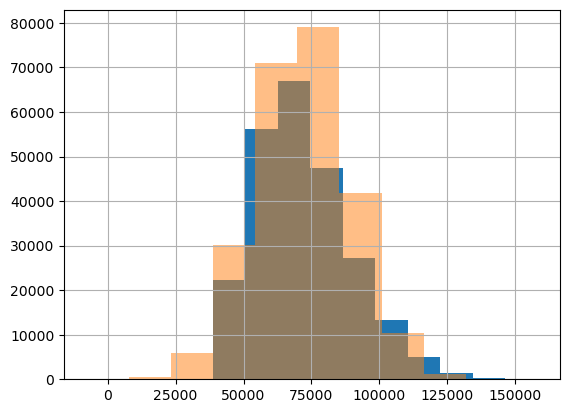

In [55]:
# histogram of actual vs theoretical salary distribution
salaries.salary.hist()
pd.Series(stats.norm(μ, σ).rvs(240124)).hist(alpha = 0.5)
